# Installing libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import math
import gc
import os
import sys
import base64
import pickle
import calendar
import lightgbm as lgb
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import optuna
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import lightgbm as lgb
from sklearn.metrics import fbeta_score
from lightgbm import *

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h1>Loading the libraries

# Loading the dataset.


In [2]:
df = pd.read_csv('training_data.csv', index_col=0) 
df

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,78830894-cdd8-43d1-9655-03db74141b7a,Female,80.0,0,1,never,25.19,6.6,140,0
1,32262c0e-903a-46b8-9061-b1a2f5a3e9b2,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,c4868b73-ca90-48ed-af14-3d1f78a5f030,Male,28.0,0,0,never,27.32,5.7,158,0
3,bec2ef91-5aff-48df-ac16-cb210b5f29fa,Female,36.0,0,0,current,23.45,5.0,155,0
4,1a6852a8-ee80-4d93-bea0-f0cdd941dc3d,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...
73713,5c890971-a6d7-44ce-a8a1-3b38cda7ef3b,Female,70.0,1,0,never,55.57,6.2,130,1
73714,13a8f177-1623-4acf-9db8-1e8ac8577c86,Male,60.0,0,0,No Info,27.32,6.6,160,0
73715,c9539d1b-075f-481f-8ae4-ab9bba75af5b,Male,65.0,0,0,former,32.07,5.0,160,0
73716,08eb5a8d-f577-440a-9408-c6d99ca17204,Male,64.0,0,0,current,30.23,6.2,158,0


In [3]:
print("No. of rows : ", df.shape[0])
print("No. of columns : ", df.shape[1])

No. of rows :  73718
No. of columns :  10


<h1> Checking how many columns and rows we have in the dataset.

# Defining the features.

In [4]:
features = [x for x in df.columns if x != 'diabetes']
features

['ID',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

<h1> Determining the number of features.

# Checking for missing values.

In [5]:
(df[features].isna().sum() / df.index.max()).sort_values(ascending = False)

ID                     0.0
gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
dtype: float64

In [6]:
df_nulls = pd.DataFrame([(df[features].isna().sum() / df.index.max()).sort_values(ascending = False) > 0.85]).transpose()
df_nulls 

,0
ID,False
gender,False
age,False
hypertension,False
heart_disease,False
smoking_history,False
bmi,False
HbA1c_level,False
blood_glucose_level,False


<h1>Checking for missing values using two different methods.

# Processing the dataset and making it readable for algorithms.

In [7]:
df = df.drop(columns=['ID'])
df.columns = [x.lower() for x in df.columns]

df = df.dropna().reset_index(drop=True)
X = df

<h1>Removing the unique ID for convenience, then making a copy of our dataset.

In [8]:
 
X['gender'] = X['gender'].astype('category') 
X['sex'] = X['gender'].cat.codes 

X['smoking_history'] = X['smoking_history'].astype('category') 
X['smoking_history_number'] = X['smoking_history'].cat.codes 

enc = OneHotEncoder() 
enc_data = pd.DataFrame(enc.fit_transform( 
    X[['smoking_history']]).toarray()) 
X = X.join(enc_data) 

X

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,diabetes,sex,smoking_history_number,0,1,2,3,4,5
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,28.0,0,0,never,27.32,5.7,158,0,1,4,0.0,0.0,0.0,0.0,1.0,0.0
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73713,Female,70.0,1,0,never,55.57,6.2,130,1,0,4,0.0,0.0,0.0,0.0,1.0,0.0
73714,Male,60.0,0,0,No Info,27.32,6.6,160,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
73715,Male,65.0,0,0,former,32.07,5.0,160,0,1,3,0.0,0.0,0.0,1.0,0.0,0.0
73716,Male,64.0,0,0,current,30.23,6.2,158,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0


<h1>Encoding categorical values of gender, then encoding smoking history.

In [9]:
X['no_info'] = X[0]
X['current'] = X[1]
X['ever'] = X[2]
X['former'] = X[3]
X['never'] = X[4]
X['not_current'] = X[5]
X = X.drop(columns=[0])
X = X.drop(columns=[1])
X = X.drop(columns=[2])
X = X.drop(columns=[3])
X = X.drop(columns=[4])
X = X.drop(columns=[5])
X = X.drop(columns=['gender'])
X = X.drop(columns=['smoking_history'])
X

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,diabetes,sex,smoking_history_number,no_info,current,ever,former,never,not_current
0,80.0,0,1,25.19,6.6,140,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,1,4,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73713,70.0,1,0,55.57,6.2,130,1,0,4,0.0,0.0,0.0,0.0,1.0,0.0
73714,60.0,0,0,27.32,6.6,160,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
73715,65.0,0,0,32.07,5.0,160,0,1,3,0.0,0.0,0.0,1.0,0.0,0.0
73716,64.0,0,0,30.23,6.2,158,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0


<h1>Changing the names of the columns.

In [10]:
scaler = MaxAbsScaler()
Z = pd.DataFrame(scaler.fit_transform(X[['age','bmi','hba1c_level','blood_glucose_level']]))
X['age'] = Z[0]
X['bmi'] = Z[1]
X['hba1c_level'] = Z[2]
X['blood_glucose_level'] = Z[3]
X

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is de

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,diabetes,sex,smoking_history_number,no_info,current,ever,former,never,not_current
0,1.0000,0,1,0.263246,0.733333,0.466667,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0
1,0.6750,0,0,0.285505,0.733333,0.266667,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.3500,0,0,0.285505,0.633333,0.526667,0,1,4,0.0,0.0,0.0,0.0,1.0,0.0
3,0.4500,0,0,0.245062,0.555556,0.516667,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0
4,0.9500,1,1,0.210471,0.533333,0.516667,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73713,0.8750,1,0,0.580729,0.688889,0.433333,1,0,4,0.0,0.0,0.0,0.0,1.0,0.0
73714,0.7500,0,0,0.285505,0.733333,0.533333,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0
73715,0.8125,0,0,0.335145,0.555556,0.533333,0,1,3,0.0,0.0,0.0,1.0,0.0,0.0
73716,0.8000,0,0,0.315916,0.688889,0.526667,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0


<h1>Also performing normalization of certain columns.

# Train_test_split

In [11]:
features = [x for x in X.columns if x != 'diabetes']
X_train, X_test, y_train, y_test = train_test_split(X[features], 
                                                    X['diabetes'],
                                                    test_size=0.30,
                                                    random_state=1437
                                                   )

In [12]:
y_train.value_counts()

diabetes
0    46986
1     4616
Name: count, dtype: int64

разделяем наш датасет для обучения нейросети проверяем количество таргетового значения в датабазе

# OVERSAMPLING -- SMOTE 

In [13]:

# Импорт
from imblearn.over_sampling import SMOTE, SMOTENC

# Создание экземпляра функции SMOTE
sm = SMOTE(random_state = 1437, n_jobs = 50, sampling_strategy = 1,
              #categorical_features = categorical_columns_indicies
          )

# Инициализация функции
X_train_2, y_train_2 = sm.fit_resample(X[features], X['diabetes']) 

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [14]:
X['diabetes'].value_counts()

diabetes
0    67168
1     6550
Name: count, dtype: int64

In [15]:
y_train_2.value_counts()

diabetes
0    67168
1    67168
Name: count, dtype: int64

In [16]:
gc.collect()

0

In [17]:
X_train_2

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,sex,smoking_history_number,no_info,current,ever,former,never,not_current
0,1.000000,0,1,0.263246,0.733333,0.466667,0,4,0.0,0.0,0.0,0.0,1.0,0.0
1,0.675000,0,0,0.285505,0.733333,0.266667,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.350000,0,0,0.285505,0.633333,0.526667,1,4,0.0,0.0,0.0,0.0,1.0,0.0
3,0.450000,0,0,0.245062,0.555556,0.516667,0,1,0.0,1.0,0.0,0.0,0.0,0.0
4,0.950000,1,1,0.210471,0.533333,0.516667,1,1,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134331,0.941281,0,1,0.289390,0.740643,0.466887,0,2,0.0,0.0,1.0,0.0,0.0,0.0
134332,0.870037,0,0,0.306844,0.823408,1.000000,1,1,0.0,1.0,0.0,0.0,0.0,0.0
134333,0.846165,0,1,0.272901,0.747853,0.514754,1,3,0.0,0.0,0.0,1.0,0.0,0.0
134334,1.000000,1,0,0.280793,0.786416,0.488516,1,3,0.0,0.0,0.0,1.0,0.0,0.0


<h1>I made a slice to see how it will affect the quality of the model determination.

# Данные с фичей

<Axes: >

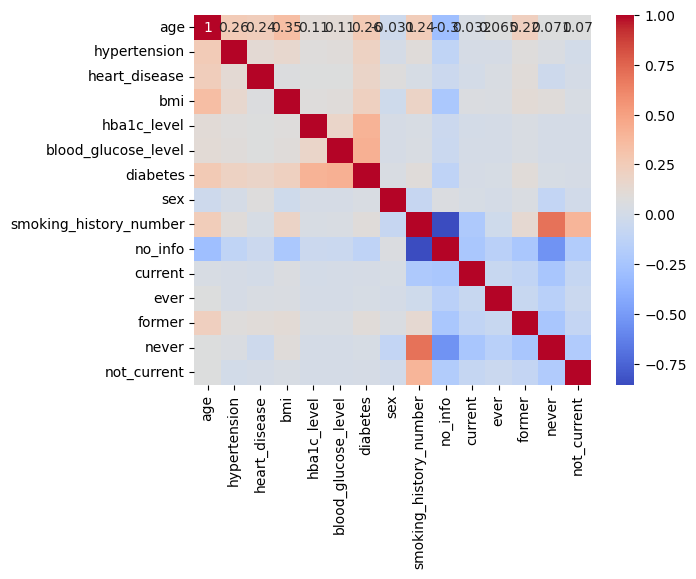

In [18]:
sns.heatmap(X.corr(),annot=True,cbar=True,cmap='coolwarm')

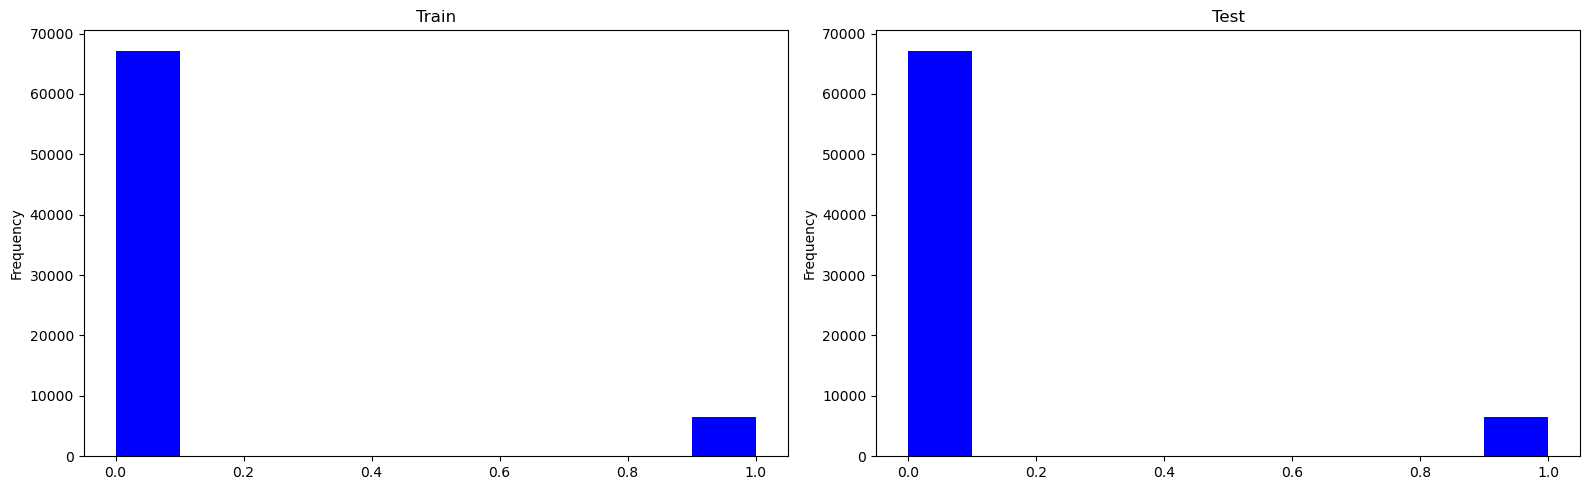

In [19]:
fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

X['diabetes'].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

X['diabetes'].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

<h1>This graph clearly shows the distribution of target values.

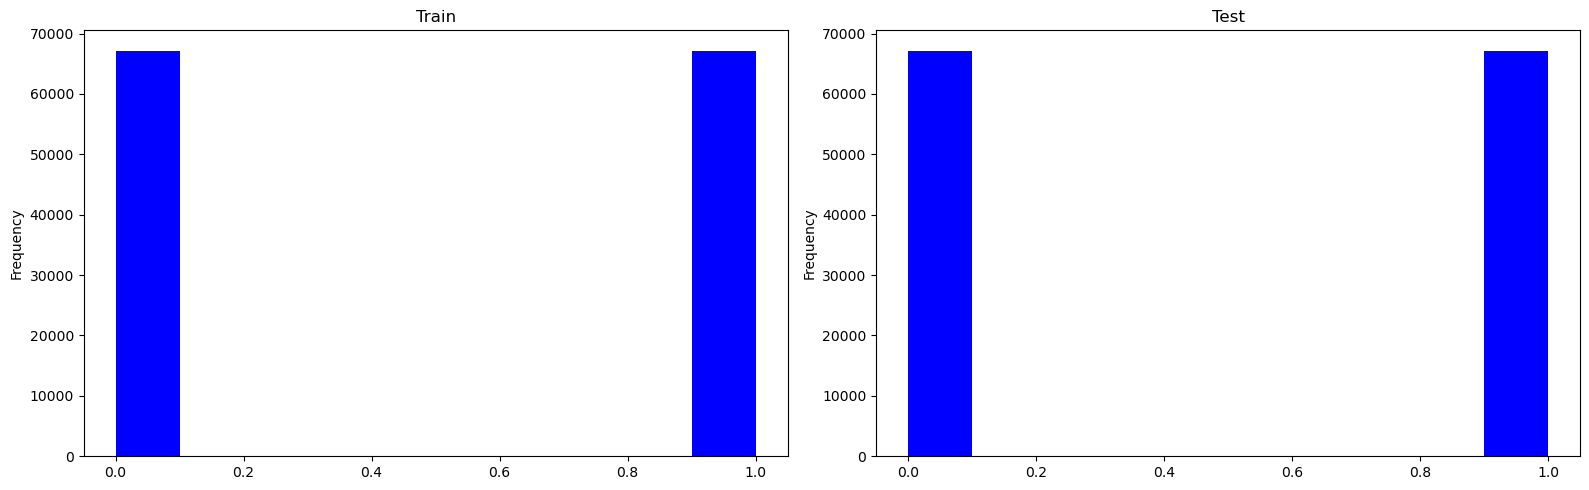

In [20]:
fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

y_train_2.plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

y_train_2.plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

<h1>This graph clearly demonstrates the distribution of target values for the database after the slicing.

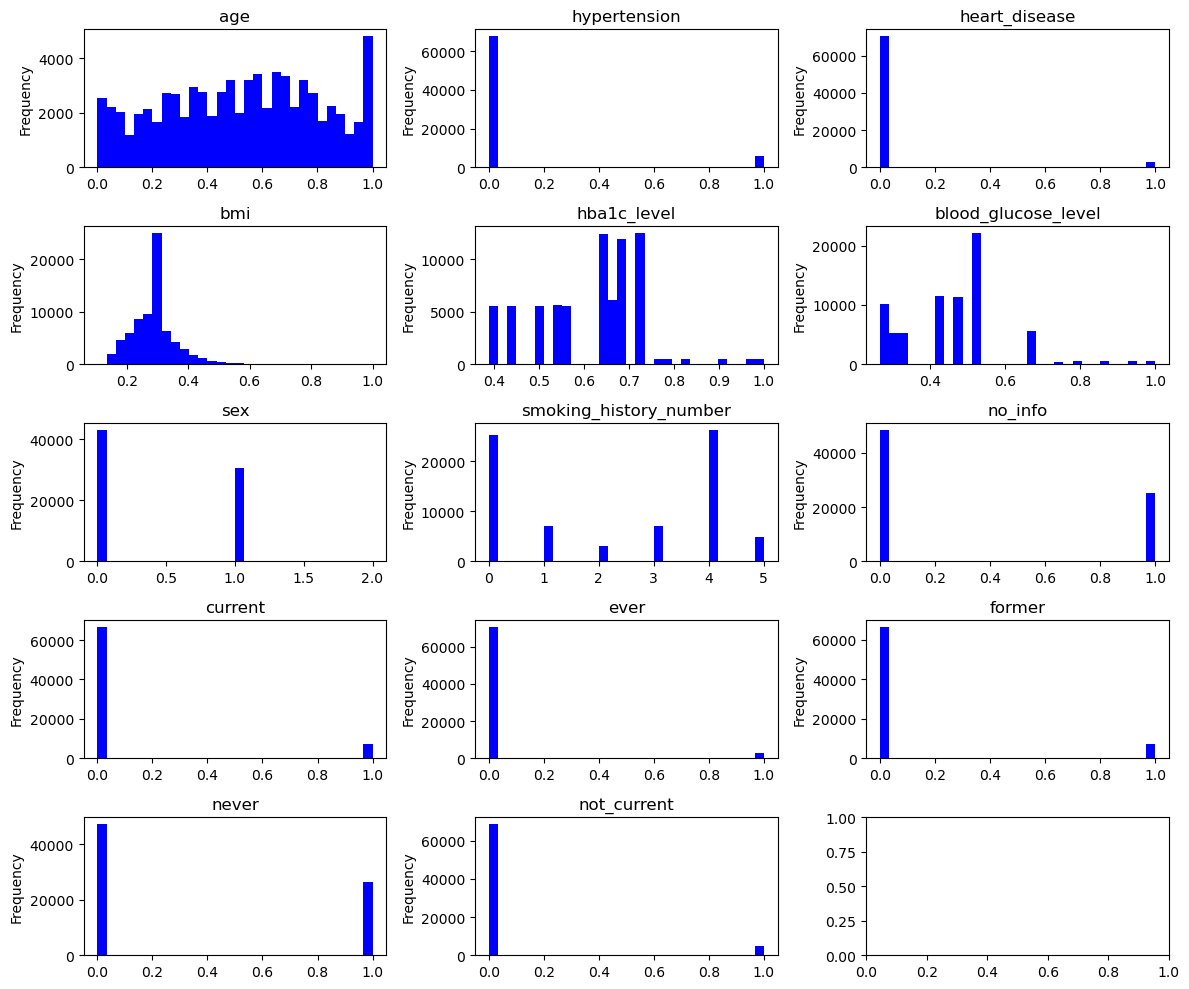

In [21]:
fig, axes = plt.subplots(5,3,figsize=(12, 10))
axes = np.ravel(axes)
features = [x for x in X.columns if x != 'diabetes']
for i, c in enumerate(features):
    hist = X[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

<h1>This graph shows the distribution of features.

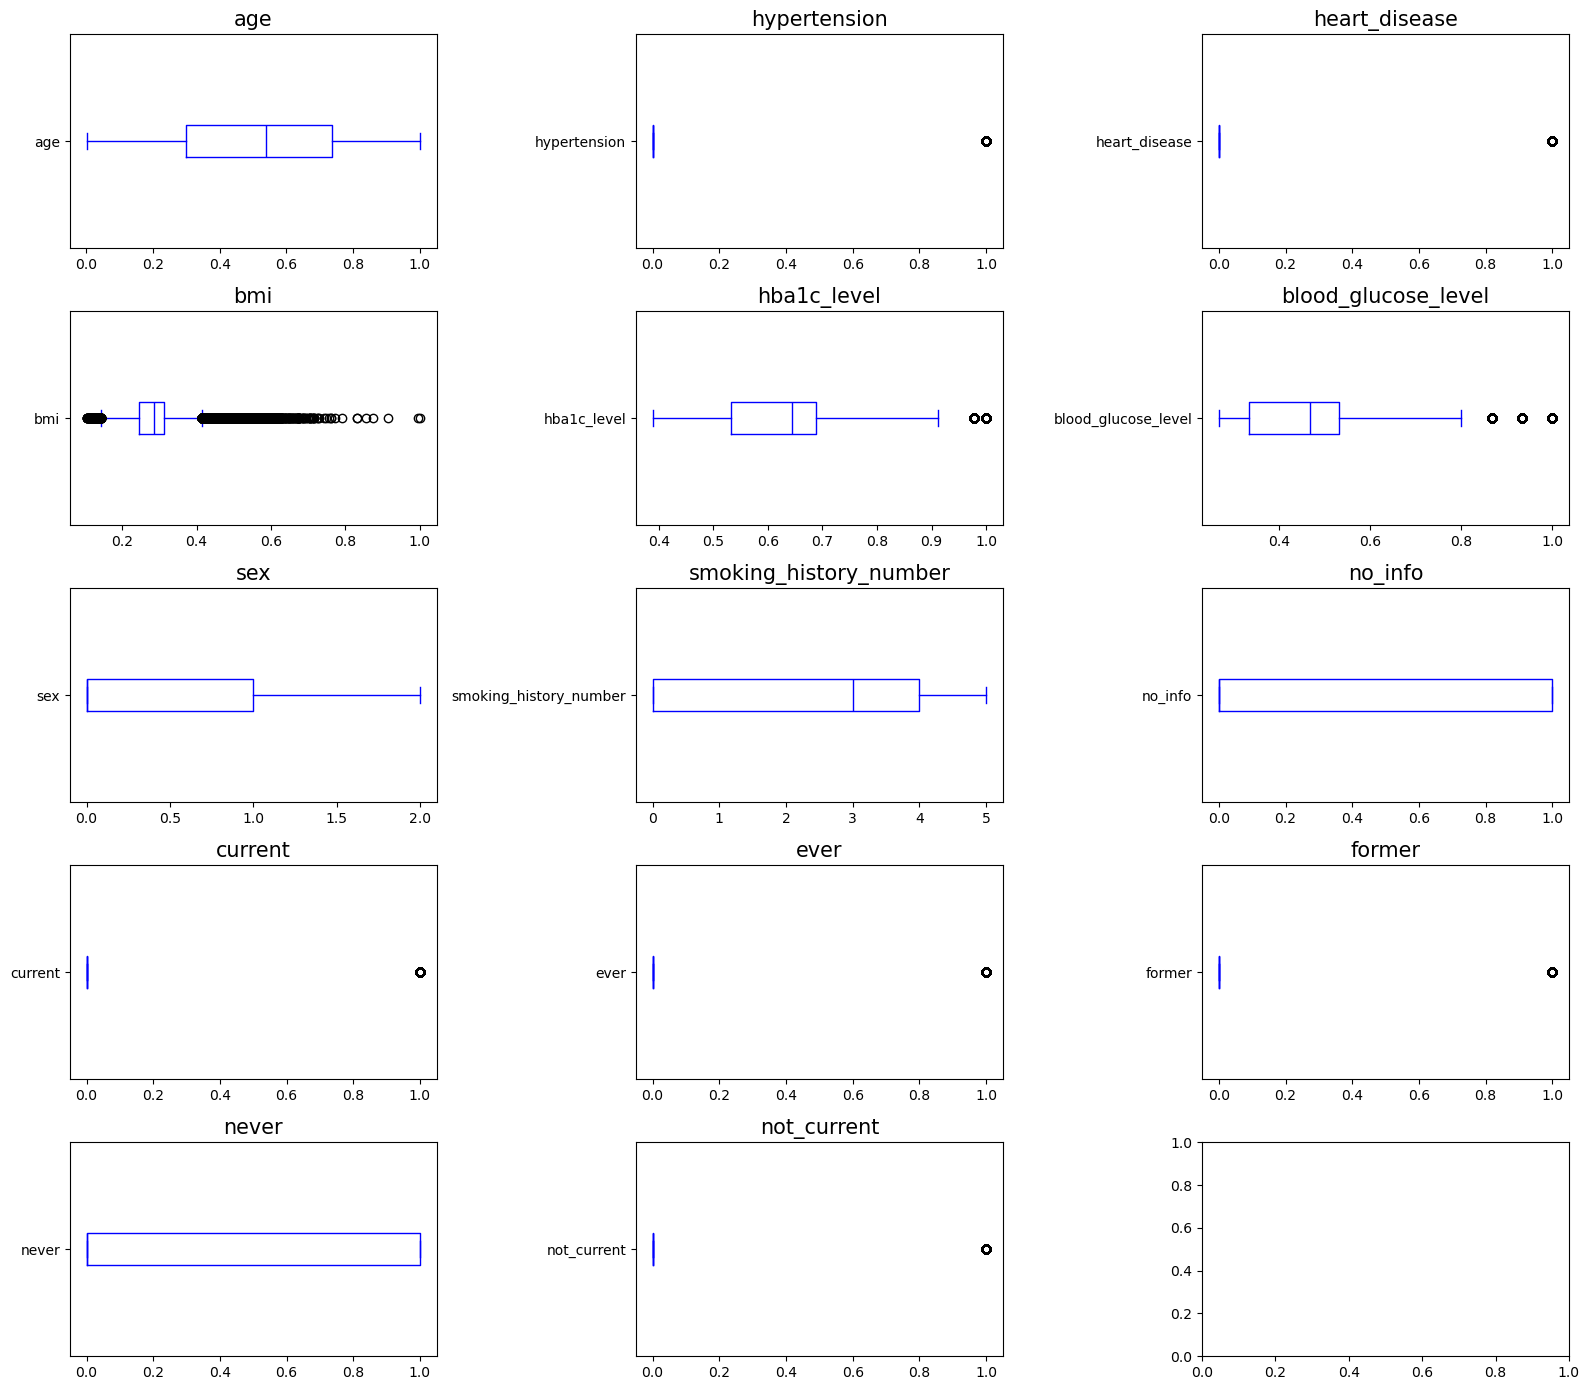

In [22]:
fig, axes = plt.subplots(5,3,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(features):
    hist = X[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

<h1>This graph shows the distribution of features.

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

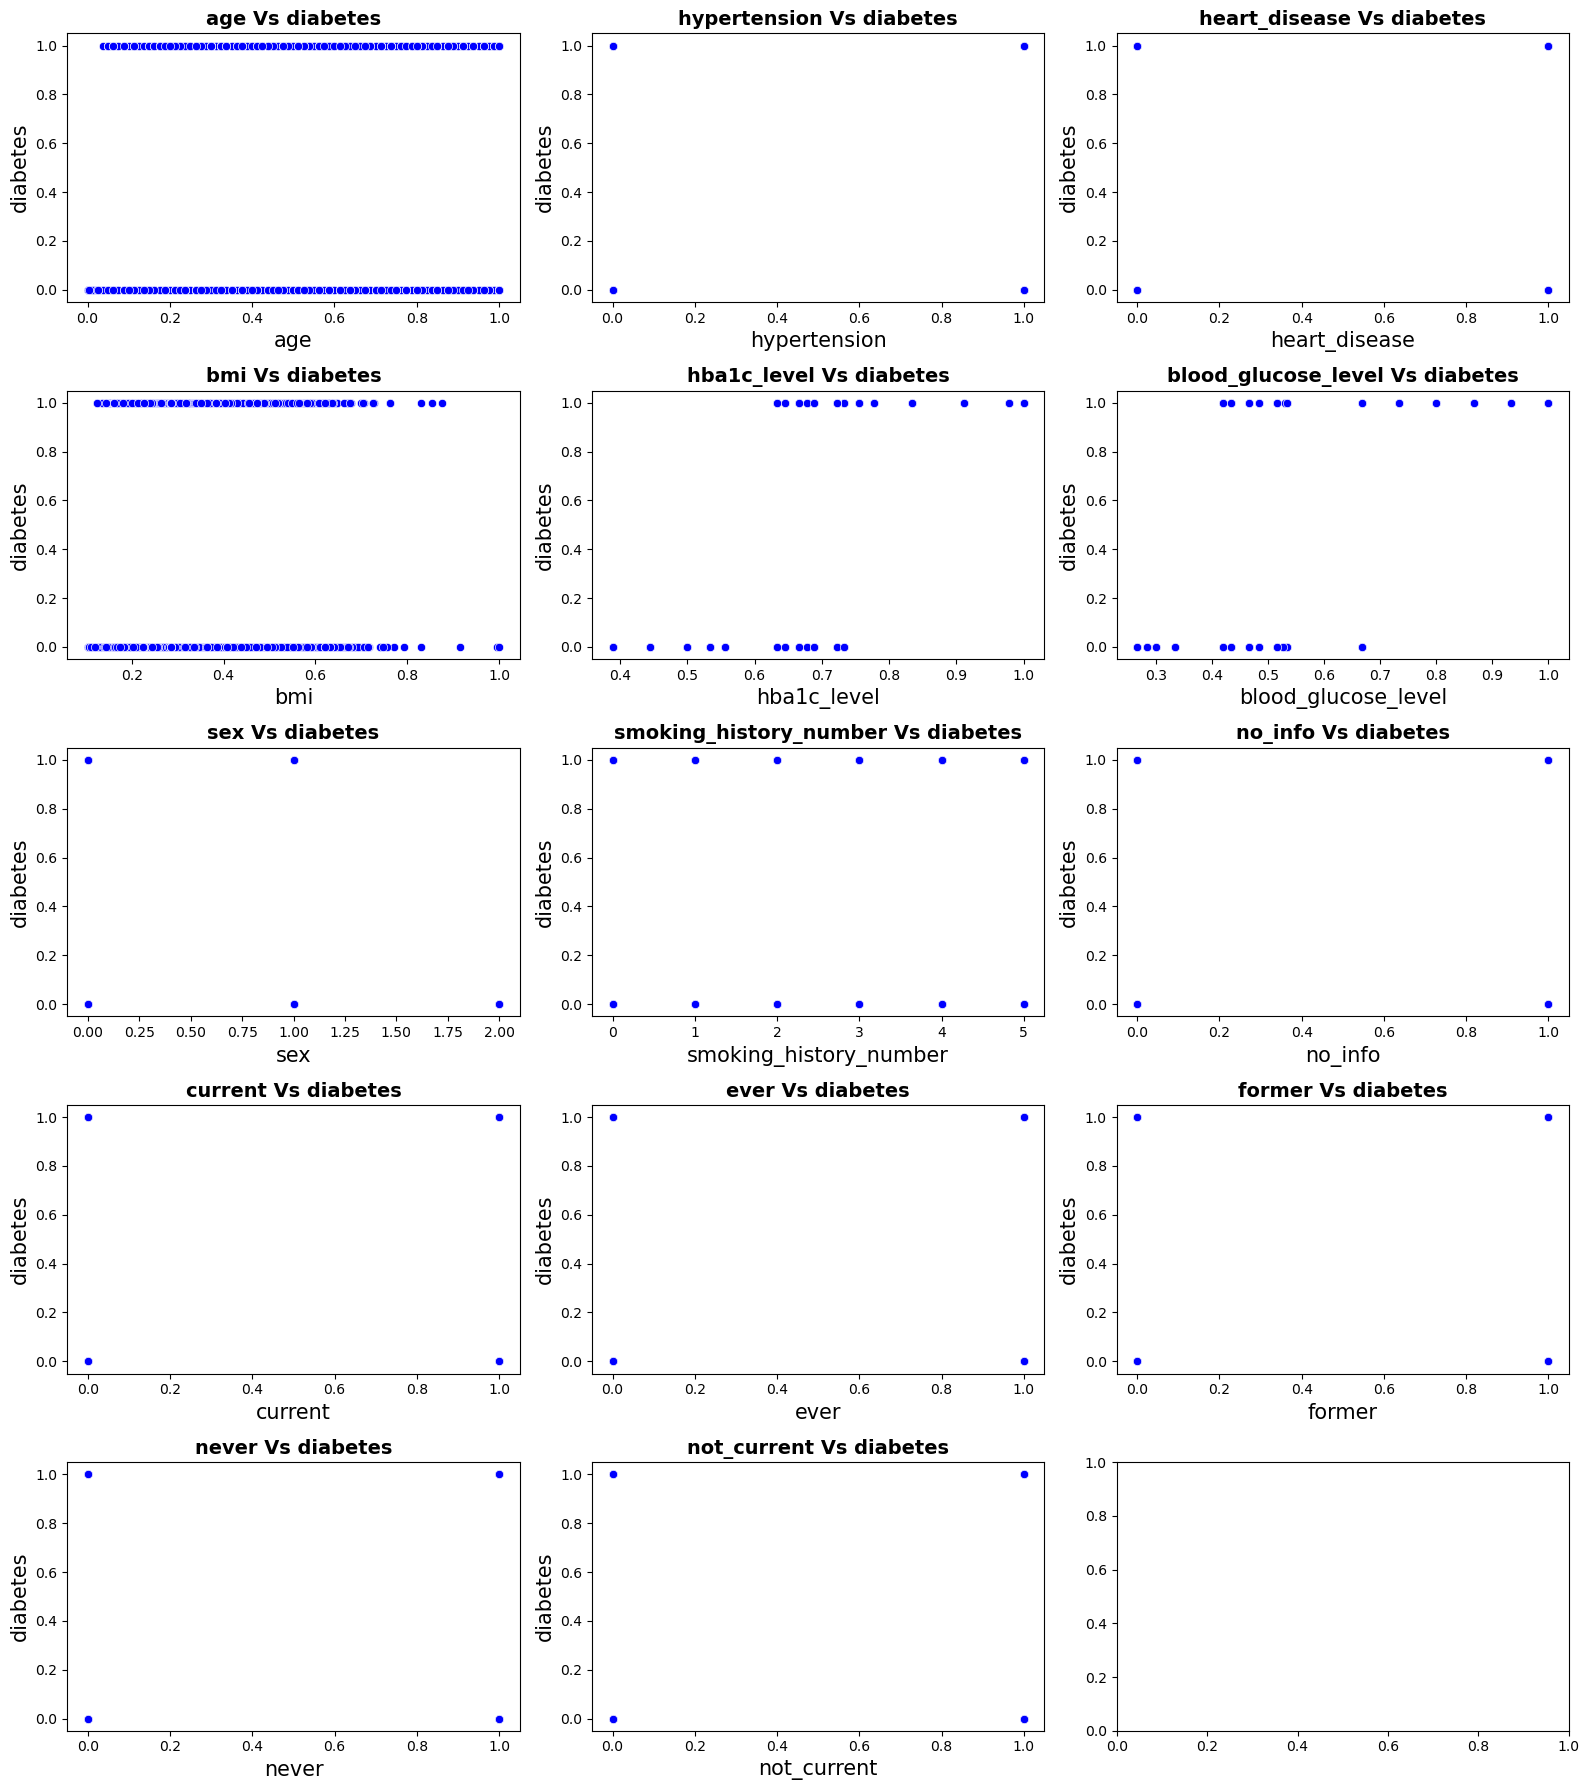

In [23]:
fig, axes = plt.subplots(5,3,figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(features):
    _ = sns.scatterplot(x=X[c],
                        y=X['diabetes'],
                        ax=axes[i],
                        color='blue')
    
    axes[i].set_title(f"{c} Vs diabetes",
                      fontsize=14, 
                      fontweight='bold')
    
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('diabetes', fontsize=15)
    
plt.tight_layout()
plt.show()

<h1>Shows the relationship between the target value and features. These graphs can provide an insight into how the neural network operates and how it determines diabetics based on certain categories and their values. For example, here it can be seen that if the HbA1c level is above a certain value, then the person is 100% likely to be diabetic.

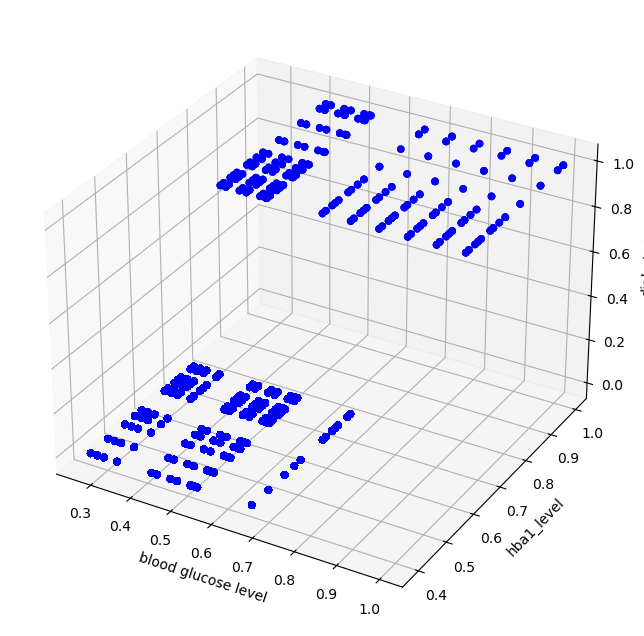

In [24]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('blood glucose level')
ax.set_ylabel('hba1_level')
ax.set_zlabel('diabetes')
ax.scatter3D(X['blood_glucose_level'],
             X['hba1c_level'], 
             X['diabetes'],
             c='blue',
             alpha=0.1);

plt.show()

<h1>Here, I have created a three-dimensional graph that, in my opinion, displays the most important features in combination with the target value.

# Modeling

In [25]:
models = {LogisticRegression(),
         
            SVC(),
         
            DecisionTreeClassifier(),
         
             RandomForestClassifier(),
         
             XGBClassifier(),
        }

In [26]:
# 
results = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)
    
    results.append({
        'Model': model,
        'F1 Score': f1,
        'Recall': recall,
        'Precision': precision,
        'Accuracy': accuracy,
    })

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

Accuracy: 0.9710164586724543
Precision: 0.9594882729211087
Recall: 0.6980351602895554
F1-score: 0.8081412750673452
Confusion Matrix:
[[20125    57]
 [  584  1350]]
Accuracy: 0.9598480737927293
Precision: 0.8757183908045977
Recall: 0.6302998965873836
F1-score: 0.7330126277811184
Confusion Matrix:
[[20009   173]
 [  715  1219]]


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is de

Accuracy: 0.9555977572797975
Precision: 0.7326490713587488
Recall: 0.7750775594622544
F1-score: 0.7532663316582915
Confusion Matrix:
[[19635   547]
 [  435  1499]]


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is de

Accuracy: 0.9585368059323567
Precision: 0.9488084730803178
Recall: 0.5558428128231644
F1-score: 0.7010107597000326
Confusion Matrix:
[[20124    58]
 [  859  1075]]


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is de

Accuracy: 0.9726894555977573
Precision: 0.9598893499308437
Recall: 0.717683557394002
F1-score: 0.821301775147929
Confusion Matrix:
[[20124    58]
 [  546  1388]]


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

<h1>Searching for the most effective algorithm for diabetes detection.

In [27]:
print(results)

[{'Model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), 'F1 Score': 0.8081412750673452, 'Recall': 0.6980351602895554, 'Precision': 0.9594882729211087, 'Accuracy': 0.9710164586724543}, {'Model': LogisticRegression(), 'F1 Score': 0.7330126277811184, 'Recall': 0.6302998965873836, 'Precision': 0

<h1>
XGBClassifier 'F1 Score': 0.8081412750673452
    
LogisticRegression 'F1 Score': 0.7330126277811184

SVC 'F1 Score': 0.7010107597000326

RandomForestClassifier 'F1 Score': 0.8221040189125296

DecisionTreeClassifier 'F1 Score': 0.7584991186099219

Standard models indicate that the most effective one is RandomForestClassifier, but I believe it's also necessary to test these algorithms on tuned models.

In [28]:
features = [x for x in X.columns if x != 'diabetes']
X_train, X_test1, y_train, y_test1 = train_test_split(X[features], 
                                                    X['diabetes'],
                                                    test_size=0.5,
                                                    random_state=1488
                                                   ) 
X_t, X_test, y_t, y_test = train_test_split(X_test1[features], 
                                                    y_test1,
                                                    test_size=0.5,
                                                    random_state=1488
                                                   ) 


<h1>After running the model training several times, I decided to divide the sample into three parts for a more accurate assessment of its training. For instance, in Evaluate predictions, a test sample is used, so I divide it into several parts to objectively evaluate the model.

In [29]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 5),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    eval_set = [(X_test, y_test)]
    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train, verbose=True) 

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [30]:
study = optuna.create_study(direction='maximize')

[I 2024-03-02 20:37:33,356] A new study created in memory with name: no-name-8cc36857-5766-43a7-8299-b0d14dfc85b5


<h1>Now, I am finding the optimal values for the XGBoost algorithm.

In [31]:
study.optimize(objective, n_trials=100)

C:\Users\aimer\AppData\Local\Temp\ipykernel_11460\3069701934.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\aimer\AppData\Local\Temp\ipykernel_11460\3069701934.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\aimer\AppData\Local\Temp\ipykernel_11460\3069701934.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.suggest_loguniform('subsample', 

In [32]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9700488334237656
  Params: 
    max_depth: 4
    learning_rate: 0.806999569133933
    n_estimators: 33
    min_child_weight: 9
    gamma: 0.02419800913654991
    subsample: 0.18357444629556988
    colsample_bytree: 0.07133988602071792
    reg_alpha: 1.8407765997752018e-08
    reg_lambda: 1.4325606840112829e-07


In [33]:
params = trial.params

In [34]:
model_ = XGBClassifier(**params)
model_.fit(X_train, y_train)

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.07133988602071792, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.02419800913654991, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.806999569133933, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              n_estimators=33, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
y_pred = model_.predict(X_t)

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

In [36]:
accuracy = accuracy_score(y_t, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 97.10%


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [37]:

f1 = f1_score(y_t, y_pred, average='weighted')
recall = recall_score(y_t, y_pred, average='weighted')
precision = precision_score(y_t, y_pred, average='weighted')
accuracy = accuracy_score(y_t, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.9685180391365233
Recall: 0.9709696673720766
Precision: 0.9713973543017084
Accuracy: 0.9709696673720766


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

def objective_dtc(trial):
    param = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }

    dtc = DecisionTreeClassifier(**param)
    return cross_val_score(dtc, X_train, y_train, n_jobs=-1, cv=3).mean()

study_dtc = optuna.create_study(direction='maximize')
study_dtc.optimize(objective_dtc, n_trials=100)

print('Best trial for Decision Tree Classifier:', study_dtc.best_trial.params)


[I 2024-03-02 20:37:47,857] A new study created in memory with name: no-name-880aa2ea-7eab-43ee-97c9-e18f3d7387a9
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-package

Best trial for Decision Tree Classifier: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 12}


In [39]:
params = study_dtc.best_trial.params
model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is de

DecisionTreeClassifier(max_depth=8, min_samples_leaf=12, min_samples_split=7)

In [40]:
y_pred = model.predict(X_t)

f1 = f1_score(y_t, y_pred, average='weighted')
recall = recall_score(y_t, y_pred, average='weighted')
precision = precision_score(y_t, y_pred, average='weighted')
accuracy = accuracy_score(y_t, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.9673478461356291
Recall: 0.9695588474686635
Precision: 0.9690544027674478
Accuracy: 0.9695588474686635


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is de

In [41]:
from sklearn.ensemble import RandomForestClassifier

def objective_rfc(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

    rfc = RandomForestClassifier(**param)


    
    return cross_val_score(rfc, X_train, y_train, n_jobs=-1, cv=3).mean()

study_rfc = optuna.create_study(direction='maximize')
study_rfc.optimize(objective_rfc, n_trials=10)

print('Best trial for Random Forest Classifier:', study_rfc.best_trial.params)


[I 2024-03-02 20:38:00,534] A new study created in memory with name: no-name-2b9512f0-9fd2-46d3-92c5-ef1563a0d144
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-package

Best trial for Random Forest Classifier: {'max_depth': 17, 'min_samples_split': 18, 'min_samples_leaf': 8, 'max_features': 'log2'}


In [42]:
params = study_rfc.best_trial.params
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is de

RandomForestClassifier(max_depth=17, max_features='log2', min_samples_leaf=8,
                       min_samples_split=18)

In [43]:
y_pred = model.predict(X_t)

f1 = f1_score(y_t, y_pred, average='weighted')
recall = recall_score(y_t, y_pred, average='weighted')
precision = precision_score(y_t, y_pred, average='weighted')
accuracy = accuracy_score(y_t, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.9685476127164585
Recall: 0.9711324542840089
Precision: 0.9719559381281554
Accuracy: 0.9711324542840089


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is de

<h1>The best tuned model for diabetes detection turned out to be XGBoost.

# Probability Distribution

<h1>When there are too many features in the database, an excess of irrelevant ones can deteriorate the results. To improve my outcomes, I will reduce the number of features, keeping only the most influential ones.

In [44]:
X1 = X
probabilities = model_.predict_proba(X1[features])
positive_class_prob = probabilities[:, 1]
X1['predicted'] = positive_class_prob


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

In [45]:
distribution = X1[[ 
            'diabetes',
            'predicted'
            ]]

In [46]:
distribution['proba_rank'] = np.ceil(distribution.predicted / 0.1) * 0.1

C:\Users\aimer\AppData\Local\Temp\ipykernel_11460\3210482480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribution['proba_rank'] = np.ceil(distribution.predicted / 0.1) * 0.1


In [47]:
to_exc = distribution[['proba_rank', 'diabetes']].groupby(by = ['proba_rank']).sum()

to_exc['cases_cnt'] = distribution[['proba_rank', 'diabetes']].groupby(by = ['proba_rank']).count()

In [48]:
to_exc

,diabetes,cases_cnt
proba_rank,,
0.1,1171,63882
0.2,513,3678
0.3,291,1164
0.4,97,367
0.5,43,127
0.6,37,71
0.7,27,51
0.8,27,33
0.9,240,241


In [49]:
def plot_feature_importance(feature_names, feature_scores, top_feats=20, title='Importance', x_label='Importance',
                        y_label='Features'):
    tuples = [(name, round(score, 3)) for name, score in zip(feature_names, feature_scores)]
    tuples = sorted(tuples, key=lambda x: x[1])[-top_feats:]
    labels, values = zip(*tuples)
    _, ax = plt.subplots(1, 1, figsize=(10, 8))
    ylocs = np.arange(len(values))
    ax.barh(ylocs, values, align='center', height=0.4)
    for x, y in zip(values, ylocs):
        ax.text(x + 1, y, x, va='center')
    ax.set_yticks(ylocs)
    ax.set_yticklabels(labels)
    xlim = (0, max(values) * 1.1)
    ax.set_xlim(xlim)
    ylim = (-1, len(values))
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True)
    return tuple

tuple

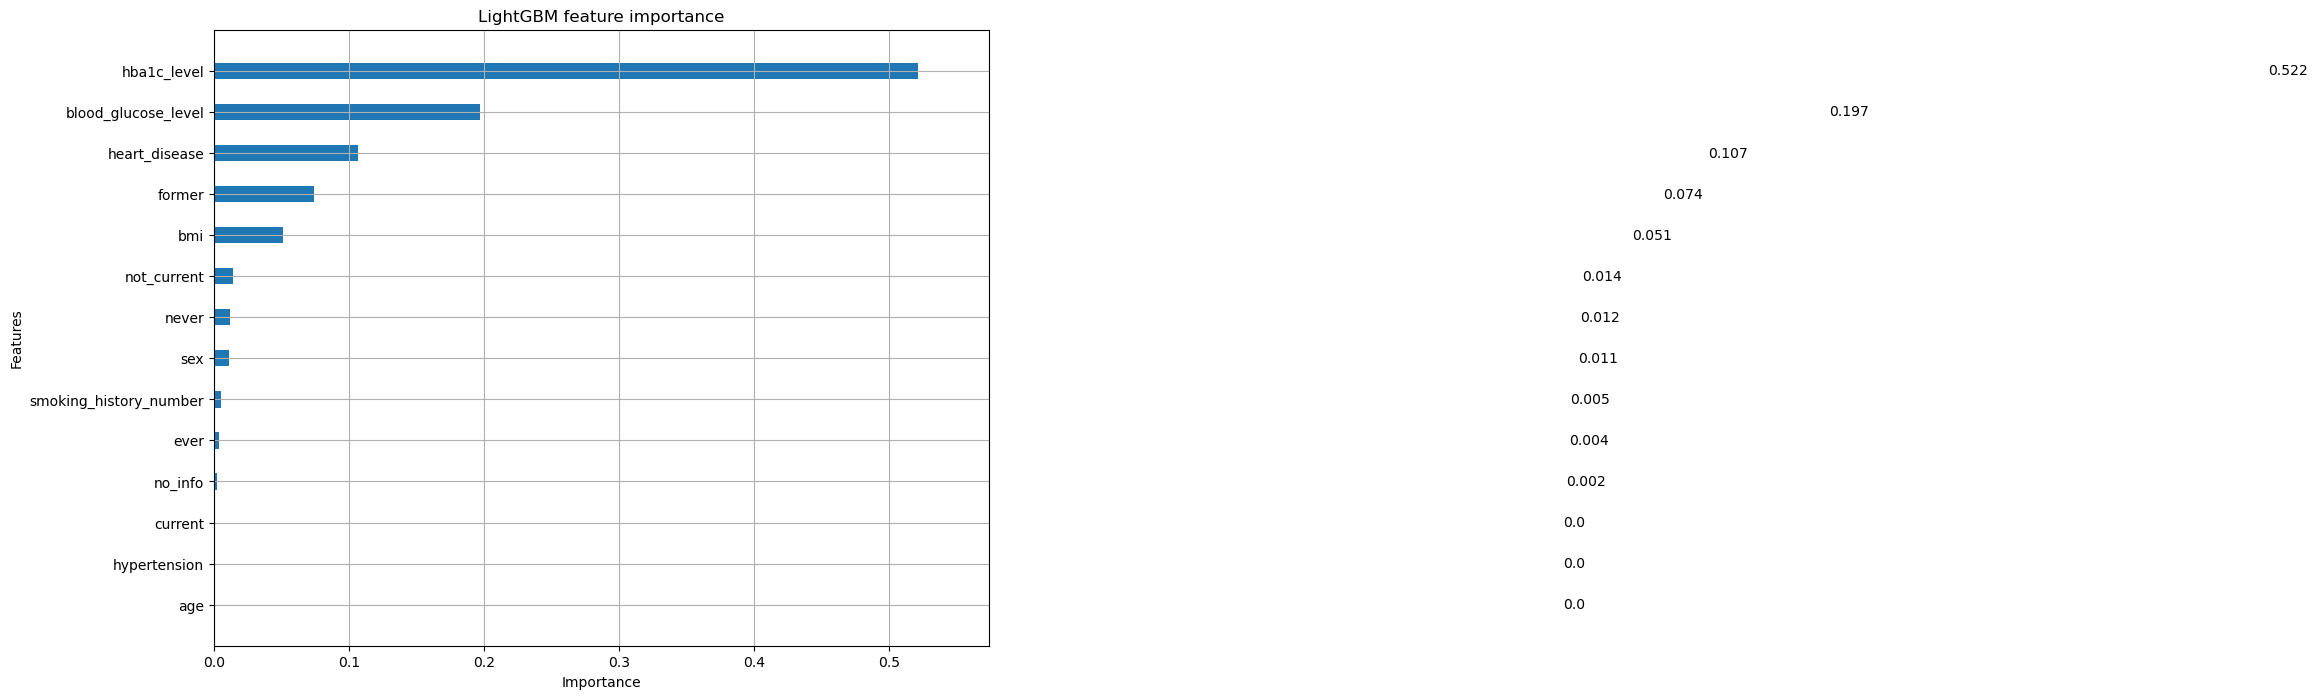

In [50]:
plot_feature_importance(features, model_.feature_importances_, top_feats=50, title='LightGBM feature importance', 
                        x_label='Importance')

In [51]:
# Assuming `features` is your list of feature names and `model_` is your trained model
tuples = [(name, round(score, 3)) for name, score in zip(features, model_.feature_importances_)]

# Print some tuples to check
print("Sample feature importances:", tuples[:5])

# Sort the tuples by score
tuples = sorted(tuples, key=lambda x: x[1], reverse=True)

# You might want to adjust this threshold based on the scale of your feature importances
threshold = 0.01  # Adjust this threshold

# Select features with importance >= threshold
top_selected_feats = [x[0] for x in tuples if x[1] >= threshold]

# Length of selected features
len_selected = len(top_selected_feats)

print("Number of selected features:", len_selected)


Sample feature importances: [('age', 0.0), ('hypertension', 0.0), ('heart_disease', 0.107), ('bmi', 0.051), ('hba1c_level', 0.522)]
Number of selected features: 8


In [52]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, KFold
import xgboost as xgb

# Assuming study.best_params contains the best parameters from your Optuna study
params = study.best_params

VERBOSE_EVAL = 10
STOP_ROUNDS = 25

# Create the XGBoost model with the best parameters
xgb_model_top_selected = XGBClassifier(objective='binary:logistic', **params, n_jobs=50, use_label_encoder=False)

print('Train results:')
eval_set = [(X_train[top_selected_feats], y_train), (X_test[top_selected_feats], y_test)]
xgb_model_top_selected.fit(X_train[top_selected_feats], y_train, 
                           eval_set=eval_set,
                           eval_metric=["logloss"],  # Add or replace with your customized eval metric
                           early_stopping_rounds=STOP_ROUNDS,
                           verbose=VERBOSE_EVAL
                          )


Train results:
[0]	validation_0-logloss:0.35525	validation_1-logloss:0.35261
[10]	validation_0-logloss:0.18219	validation_1-logloss:0.18226
[20]	validation_0-logloss:0.17184	validation_1-logloss:0.17292
[30]	validation_0-logloss:0.16970	validation_1-logloss:0.17113
[32]	validation_0-logloss:0.16969	validation_1-logloss:0.17112
CPU times: total: 1.39 s
Wall time: 139 ms


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_s

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.07133988602071792, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.02419800913654991, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.806999569133933, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              n_estimators=33, n_jobs=50, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [97]:
X_train['predicted'] = xgb_model_top_selected.predict(X_train[top_selected_feats])

y_pred = X_train['predicted']


f1 = f1_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
precision = precision_score(y_train, y_pred, average='weighted')
accuracy = accuracy_score(y_train, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.9346580451987212
Recall: 0.9447896036246236
Precision: 0.9446938246739449
Accuracy: 0.9447896036246236


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

<h1>The results deteriorated because there are few features, and all of them are important for the model.

In [54]:
X_test['predicted'] = xgb_model_top_selected.predict(X_test[top_selected_feats])

y_pred = X_test['predicted']


f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.9342750953570677
Recall: 0.9446011937059142
Precision: 0.9438884225604787
Accuracy: 0.9446011937059142


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

In [55]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 5),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }
    eval_set = [(X_test, y_test)]
    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train_2, y_train_2, verbose=True) 

    # Make predictions
    y_pred = optuna_model.predict(X_train_2)

    # Evaluate predictions
    accuracy = accuracy_score(y_train_2, y_pred)
    return accuracy
    

In [56]:
study = optuna.create_study(direction='maximize')

[I 2024-03-02 20:38:11,998] A new study created in memory with name: no-name-4b2d367f-5ea1-44fe-888f-0c7036dcb6b1


In [57]:
study.optimize(objective, n_trials=100)

C:\Users\aimer\AppData\Local\Temp\ipykernel_11460\2856081250.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\aimer\AppData\Local\Temp\ipykernel_11460\2856081250.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\aimer\AppData\Local\Temp\ipykernel_11460\2856081250.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.suggest_loguniform('subsample', 

In [58]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9804892210576465
  Params: 
    max_depth: 5
    learning_rate: 0.8938389005661987
    n_estimators: 87
    min_child_weight: 8
    gamma: 0.15261209058559733
    subsample: 0.673979567060871
    colsample_bytree: 0.24425593433641687
    reg_alpha: 3.114386814871194e-07
    reg_lambda: 0.10824843170696812


In [59]:
params = trial.params

In [60]:
model_1 = XGBClassifier(**params)
model_1.fit(X_train, y_train)

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.24425593433641687, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.15261209058559733, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.8938389005661987, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              n_estimators=87, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [61]:
X_t

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,sex,smoking_history_number,no_info,current,ever,former,never,not_current
17535,0.1500,0,0,0.285505,0.444444,0.333333,0,4,0.0,0.0,0.0,0.0,1.0,0.0
19904,0.8500,0,0,0.285505,0.666667,0.466667,1,5,0.0,0.0,0.0,0.0,0.0,1.0
50112,1.0000,0,0,0.291253,0.666667,0.666667,0,4,0.0,0.0,0.0,0.0,1.0,0.0
61537,0.7000,0,0,0.237747,0.533333,0.526667,1,4,0.0,0.0,0.0,0.0,1.0,0.0
57496,0.8000,0,0,0.308601,0.677778,0.300000,0,4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68398,0.4000,0,0,0.303062,0.688889,0.283333,0,4,0.0,0.0,0.0,0.0,1.0,0.0
47637,0.7625,0,0,0.322918,0.755556,0.516667,1,1,0.0,1.0,0.0,0.0,0.0,0.0
6473,0.2875,0,0,0.285505,0.555556,0.533333,1,4,0.0,0.0,0.0,0.0,1.0,0.0
50272,0.8500,0,0,0.302539,0.388889,0.420000,0,5,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
y_pred = model_1.predict(X_test)

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

In [63]:

f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

F1 Score: 0.9645249028734474
Recall: 0.9662506782419967
Precision: 0.9647168514334126
Accuracy: 0.9662506782419967


C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

<h1>Testing the effectiveness of the data with and without a slice to ensure their significance.

# DUMP SHMALL MODEL TO PICKLE 

In [64]:
import pickle

filename = 'model_v1.pkl'
pickle.dump(model_, open(filename, 'wb'))

In [65]:
model_from_pickle = pickle.load(open('model_v1.pkl', 'rb'))

In [66]:
model_from_pickle.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.07133988602071792,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.02419800913654991,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.806999569133933,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 4,
 'max_leaves': None,
 'min_child_weight': 9,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 33,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 1.8407765997752018e-08,
 'reg_lambda': 1.4325606840112829e-07,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.18357444629556988,
 'tree_method': None,
 'v

# Final

In [79]:
df1 = pd.read_csv('test_data.csv', index_col=0) 
features = [x for x in df1.columns if x != 'diabetes']
df_nulls = pd.DataFrame([(df1[features].isna().sum() / df1.index.max()).sort_values(ascending = False) > 0.85]).transpose()
print(df_nulls)

                         0
ID                   False
gender               False
age                  False
hypertension         False
heart_disease        False
smoking_history      False
bmi                  False
HbA1c_level          False
blood_glucose_level  False


In [80]:
df1 = df1.drop(columns=['ID'])
df1.columns = [x.lower() for x in df1.columns]

df1 = df1.dropna().reset_index(drop=True)
X = df1

In [81]:
 
X['gender'] = X['gender'].astype('category') 
X['sex'] = X['gender'].cat.codes 

X['smoking_history'] = X['smoking_history'].astype('category') 
X['smoking_history_number'] = X['smoking_history'].cat.codes 

enc = OneHotEncoder() 
enc_data = pd.DataFrame(enc.fit_transform( 
    X[['smoking_history']]).toarray()) 
X = X.join(enc_data) 

X

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version.

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,sex,smoking_history_number,0,1,2,3,4,5
0,Female,60.0,1,0,former,23.77,4.8,130,0,3,0.0,0.0,0.0,1.0,0.0,0.0
1,Male,2.0,0,0,No Info,15.19,5.0,159,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,Female,74.0,0,0,not current,39.59,6.5,160,0,5,0.0,0.0,0.0,0.0,0.0,1.0
3,Female,51.0,0,0,never,26.67,6.6,80,0,4,0.0,0.0,0.0,0.0,1.0,0.0
4,Male,35.0,0,0,never,26.09,3.5,159,1,4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26141,Female,31.0,0,0,never,27.32,6.1,140,0,4,0.0,0.0,0.0,0.0,1.0,0.0
26142,Female,65.0,1,1,never,27.25,5.7,100,0,4,0.0,0.0,0.0,0.0,1.0,0.0
26143,Male,30.0,1,0,former,57.17,5.8,300,1,3,0.0,0.0,0.0,1.0,0.0,0.0
26144,Male,20.0,0,0,never,32.70,6.2,159,1,4,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
X['no_info'] = X[0]
X['current'] = X[1]
X['ever'] = X[2]
X['former'] = X[3]
X['never'] = X[4]
X['not_current'] = X[5]
X = X.drop(columns=[0])
X = X.drop(columns=[1])
X = X.drop(columns=[2])
X = X.drop(columns=[3])
X = X.drop(columns=[4])
X = X.drop(columns=[5])
X = X.drop(columns=['gender'])
X = X.drop(columns=['smoking_history'])
X

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,sex,smoking_history_number,no_info,current,ever,former,never,not_current
0,60.0,1,0,23.77,4.8,130,0,3,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,0,0,15.19,5.0,159,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,74.0,0,0,39.59,6.5,160,0,5,0.0,0.0,0.0,0.0,0.0,1.0
3,51.0,0,0,26.67,6.6,80,0,4,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,26.09,3.5,159,1,4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26141,31.0,0,0,27.32,6.1,140,0,4,0.0,0.0,0.0,0.0,1.0,0.0
26142,65.0,1,1,27.25,5.7,100,0,4,0.0,0.0,0.0,0.0,1.0,0.0
26143,30.0,1,0,57.17,5.8,300,1,3,0.0,0.0,0.0,1.0,0.0,0.0
26144,20.0,0,0,32.70,6.2,159,1,4,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
scaler = MaxAbsScaler()
Z = pd.DataFrame(scaler.fit_transform(X[['age','bmi','hba1c_level','blood_glucose_level']]))
X['age'] = Z[0]
X['bmi'] = Z[1]
X['hba1c_level'] = Z[2]
X['blood_glucose_level'] = Z[3]
X

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is de

,age,hypertension,heart_disease,bmi,hba1c_level,blood_glucose_level,sex,smoking_history_number,no_info,current,ever,former,never,not_current
0,0.7500,1,0,0.258876,0.533333,0.433333,0,3,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0250,0,0,0.165432,0.555556,0.530000,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.9250,0,0,0.431170,0.722222,0.533333,0,5,0.0,0.0,0.0,0.0,0.0,1.0
3,0.6375,0,0,0.290460,0.733333,0.266667,0,4,0.0,0.0,0.0,0.0,1.0,0.0
4,0.4375,0,0,0.284143,0.388889,0.530000,1,4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26141,0.3875,0,0,0.297539,0.677778,0.466667,0,4,0.0,0.0,0.0,0.0,1.0,0.0
26142,0.8125,1,1,0.296776,0.633333,0.333333,0,4,0.0,0.0,0.0,0.0,1.0,0.0
26143,0.3750,1,0,0.622631,0.644444,1.000000,1,3,0.0,0.0,0.0,1.0,0.0,0.0
26144,0.2500,0,0,0.356132,0.688889,0.530000,1,4,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:

features = [x for x in X.columns if x != 'diabetes']
probabilities = model_.predict(X[features])
df1['predicted'] = probabilities

df1

C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

,gender,age,hypertension,heart_disease,smoking_history,bmi,hba1c_level,blood_glucose_level,sex,smoking_history_number,predicted
0,Female,60.0,1,0,former,23.77,4.8,130,0,3,0
1,Male,2.0,0,0,No Info,15.19,5.0,159,1,0,0
2,Female,74.0,0,0,not current,39.59,6.5,160,0,5,0
3,Female,51.0,0,0,never,26.67,6.6,80,0,4,0
4,Male,35.0,0,0,never,26.09,3.5,159,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
26141,Female,31.0,0,0,never,27.32,6.1,140,0,4,0
26142,Female,65.0,1,1,never,27.25,5.7,100,0,4,0
26143,Male,30.0,1,0,former,57.17,5.8,300,1,3,1
26144,Male,20.0,0,0,never,32.70,6.2,159,1,4,0


In [89]:
features = [x for x in X.columns if x != 'diabetes']  # Excluding the target variable 'diabetes'
# Ensure that model_ is trained on X[features] and not on the entire X DataFrame

probabilities = model_.predict(X[features])  # Make predictions using the same features as training



C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\aimer\anaconda3\envs\DatasSiense_20240127\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

In [90]:
df1 = pd.read_csv('test_data.csv', index_col=0) 
df1

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,ba0d6256-ca6e-46a7-a2fb-2518a8937fd7,Female,60.0,1,0,former,23.77,4.8,130
1,7102b1ab-c7a4-4a43-b1fc-cb588d0553b8,Male,2.0,0,0,No Info,15.19,5.0,159
2,51ba207e-4934-41b4-a31c-cd275c5ca555,Female,74.0,0,0,not current,39.59,6.5,160
3,7e17faaa-0402-4728-9719-83982eba3afd,Female,51.0,0,0,never,26.67,6.6,80
4,08b4e515-286e-4393-9a55-138962f9546e,Male,35.0,0,0,never,26.09,3.5,159
...,...,...,...,...,...,...,...,...,...
26141,1f8db6fe-03f8-48ca-9a42-9f12062b002d,Female,31.0,0,0,never,27.32,6.1,140
26142,5bf3ca1a-ced5-474b-a354-cc3bec9f16d3,Female,65.0,1,1,never,27.25,5.7,100
26143,930e6345-a920-47dd-abd0-6bc0be2ae56f,Male,30.0,1,0,former,57.17,5.8,300
26144,035f3cc4-e8af-448a-8172-a1b027e06de1,Male,20.0,0,0,never,32.70,6.2,159


In [91]:
df1 = df1.drop(columns=['age'])
df1 = df1.drop(columns=['gender'])
df1 = df1.drop(columns=['hypertension'])
df1 = df1.drop(columns=['heart_disease'])
df1 = df1.drop(columns=['smoking_history'])
df1 = df1.drop(columns=['bmi'])
df1 = df1.drop(columns=['HbA1c_level'])
df1 = df1.drop(columns=['blood_glucose_level'])

In [94]:
df1['prediction'] = probabilities
df1

,ID,prediction
0,ba0d6256-ca6e-46a7-a2fb-2518a8937fd7,0
1,7102b1ab-c7a4-4a43-b1fc-cb588d0553b8,0
2,51ba207e-4934-41b4-a31c-cd275c5ca555,0
3,7e17faaa-0402-4728-9719-83982eba3afd,0
4,08b4e515-286e-4393-9a55-138962f9546e,0
...,...,...
26141,1f8db6fe-03f8-48ca-9a42-9f12062b002d,0
26142,5bf3ca1a-ced5-474b-a354-cc3bec9f16d3,0
26143,930e6345-a920-47dd-abd0-6bc0be2ae56f,1
26144,035f3cc4-e8af-448a-8172-a1b027e06de1,0


In [95]:
df1.to_csv('answer.csv')

<h1>In conclusion, I would like to say that I trust these data, as I have conducted extensive research in which I identified the most effective algorithms with the best hyperparameters for diagnosing diabetes.